In [12]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

#importing data
data=pd.read_csv('vw_churndata.csv')
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [13]:
data.head(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [14]:
#data preprocessing
data=data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

In [15]:
data.head(5)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,35,No,Delhi,7,27,NaN,Yes,No,Yes,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,Yes,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [16]:
#list of columns to be label encoded
columns_to_encode=['Gender','Married','State','Value_Deal','Phone_Service', 'Multiple_Lines','Internet_Service',
                   'Internet_Type','Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support',
                   'Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract',
                   'Paperless_Billing','Payment_Method' 
]

# encode categorical values
labelencoder={}
for column in columns_to_encode:
    labelencoder[column]=LabelEncoder()
    data[column]=labelencoder[column].fit_transform(data[column])

#manually encode the target variable
data['Customer_Status']=data['Customer_Status'].map({'Stayed':0,'Churned':1})
x=data.drop('Customer_Status',axis=1)
y=data['Customer_Status']

#spliting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_preds=model.predict(x_test)

In [22]:
cm=confusion_matrix(y_test,y_preds)
cr=classification_report(y_test,y_preds)
print('Confusion Matrix is:\n')
print(f'{cm}\n')
print('Classfication Report is:\n')
print(f'{cr}\n')

Confusion Matrix is:

[[135   6]
 [ 25  34]]

Classfication Report is:

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       141
           1       0.85      0.58      0.69        59

    accuracy                           0.84       200
   macro avg       0.85      0.77      0.79       200
weighted avg       0.85      0.84      0.84       200




C:\Users\Akanksha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akanksha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akanksha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


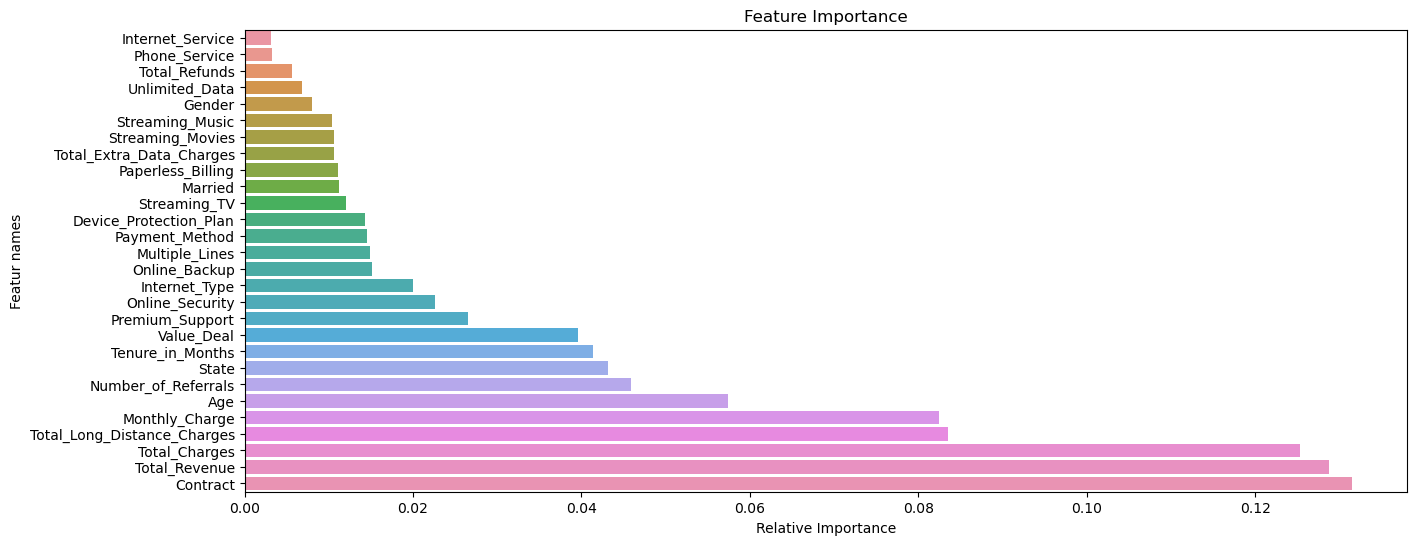

In [27]:
#Feature selection using feature extraction
importances=model.feature_importances_
indices=np.argsort(importances)

#plot the features importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=x.columns[indices])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Featur names')
plt.show()

In [33]:
#predicting new data
new_data=pd.read_csv('vw_joindata.csv')
new_data.head()
#keeping original data
original_data=new_data.copy()
#retain the customer id
customer_ids=new_data['Customer_ID']
#dropping columnsthat are not usable
new_data=new_data.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'],axis=1)
#encode categorical data
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column]=labelencoder[column].transform(new_data[column])
    
#make predictions
new_predictions=model.predict(new_data)
#add prediction to original data
original_data['Customer_Status_predicted']=new_predictions
#filter the data with values having churned output
original_data=original_data[original_data['Customer_Status_predicted']==1]
#coverting data into csv
original_data.to_csv('Predictions')